In [2]:
# TUGAS 1

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/31 08:51:11 WARN Utils: Your hostname, ZaraBigDataa, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/10/31 08:51:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/31 08:51:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+



[Stage 4:=======================================>                   (2 + 1) / 3]

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [3]:
# TUGAS 2

spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [4]:
# TUGAS TAMBAHAN NO 2 (1)
# MENCARI RATA-RATA GAJI PER DEPARTEMEN

spark.sql("""
    SELECT DeptId, AVG(Salary) AS Salary
    FROM employees
    GROUP BY DeptId
""").show()

+------+------+
|DeptId|Salary|
+------+------+
|     1|2850.0|
|     2|4100.0|
+------+------+



In [5]:
# TUGAS TAMBAHAN NO 2 (2)
# KARYAWAN DENGAN GAJI DI ATAS RATA-RATA PADA SETIAP GENDER

spark.sql("""
    SELECT Name, Gender, Salary
    FROM employees
    WHERE Salary > (
        SELECT AVG(Salary)
        FROM employees AS e2
        WHERE e2.Gender = employees.Gender
    )
""").show()

+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+



In [6]:
# TUGAS TAMBAHAN NO 2 (3)
# RANKING KARYAWAN BERDASARKAN GAJI DALAM DEPARTEMEN

spark.sql("""
    SELECT 
        Name, DeptId, Salary,
        RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
    FROM employees
""").show()

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [7]:
# TUGAS 3

spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [8]:
# TUGAS 4

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


25/10/31 08:52:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
                                                                                

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [9]:
# TUGAS 5 

spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY d.DeptName) AS AvgSalaryDept,
    RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---------+------+-------------+----------+
| Name| DeptName|Salary|AvgSalaryDept|SalaryRank|
+-----+---------+------+-------------+----------+
|James|       HR|  3000|       2850.0|         1|
|  Lee|       HR|  2700|       2850.0|         2|
| Anna|Marketing|  4100|       4100.0|         1|
+-----+---------+------+-------------+----------+



In [10]:
# TUGAS 6

spark.sql('''
SELECT 
    e.Name,
    d.DeptName,
    e.Age,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY d.DeptName ORDER BY e.Age) AS SalaryTrend
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''').show()

+-----+---------+---+------+-----------+
| Name| DeptName|Age|Salary|SalaryTrend|
+-----+---------+---+------+-----------+
|  Lee|       HR| 23|  2700|     2700.0|
|James|       HR| 34|  3000|     2850.0|
| Anna|Marketing| 28|  4100|     4100.0|
+-----+---------+---+------+-----------+



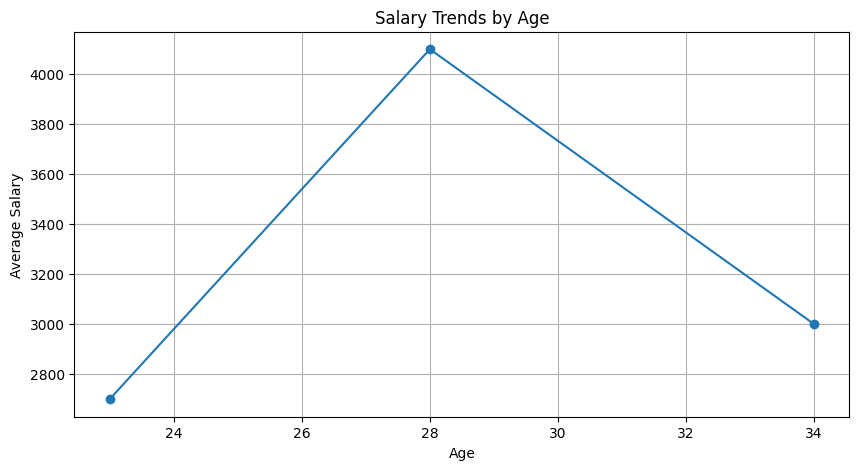

In [11]:
# TUGAS 7

import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

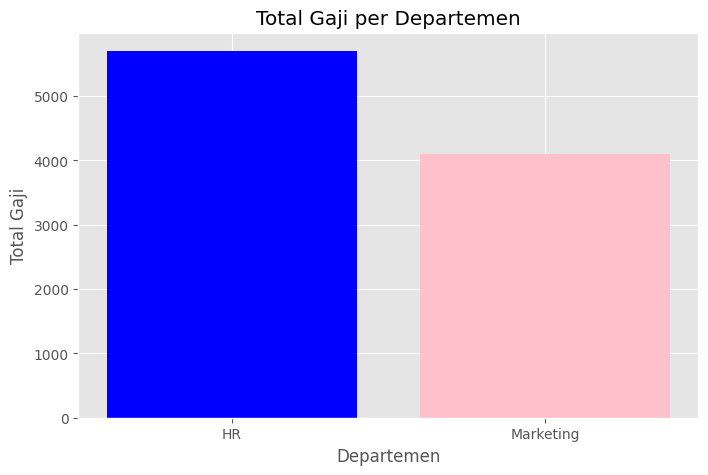

In [17]:
# HOMEWORK TUGAS 1 

import matplotlib.pyplot as plt
import pandas as pd

dept_summary = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS TotalEmployees
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(dept_summary['DeptName'], dept_summary['TotalSalary'], color=['blue', 'pink'])
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.show()

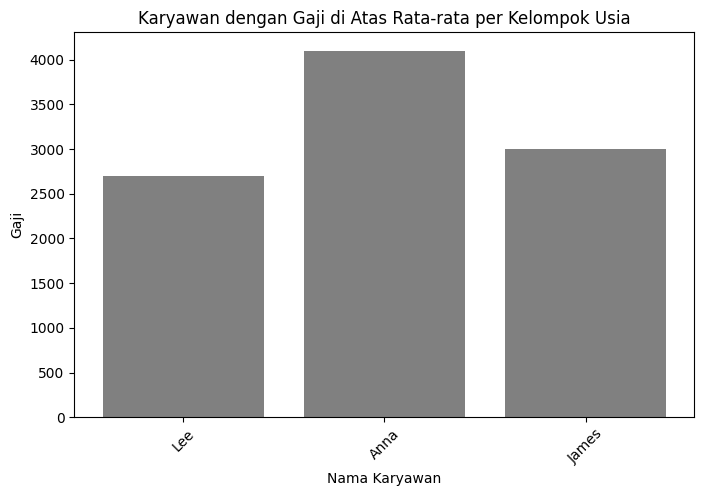

In [13]:
# HOMEWORK TUGAS 2

import pandas as pd 

above_avg = spark.sql('''
SELECT 
    e.Name,
    e.Age,
    e.Salary
FROM employees e
JOIN (
    SELECT Age, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Age
) a ON e.Age = a.Age
WHERE e.Salary >= a.AvgSalary 
ORDER BY e.Age
''').toPandas()

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(above_avg['Name'], above_avg['Salary'], color='grey')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.xticks(rotation=45)
plt.show()

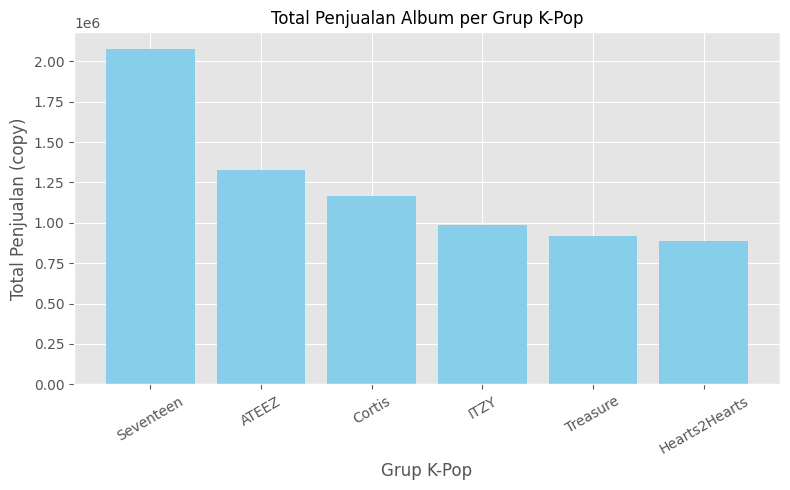

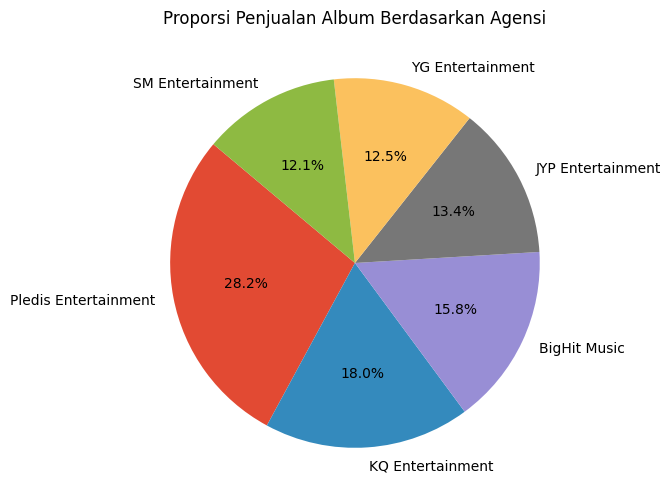

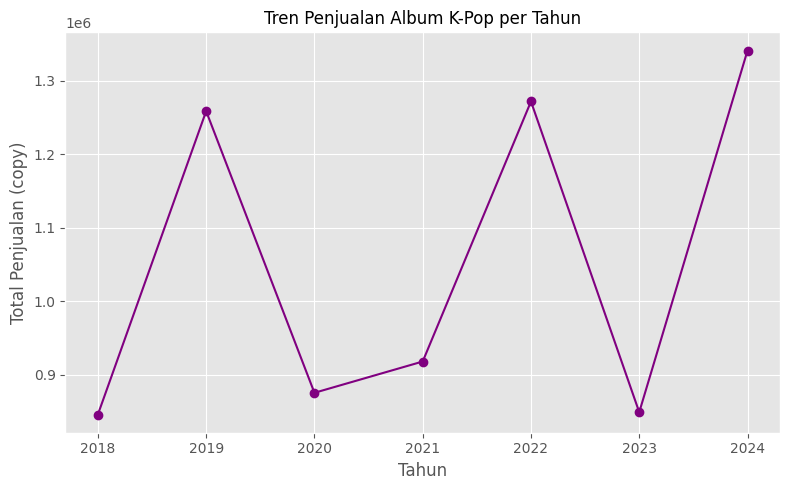

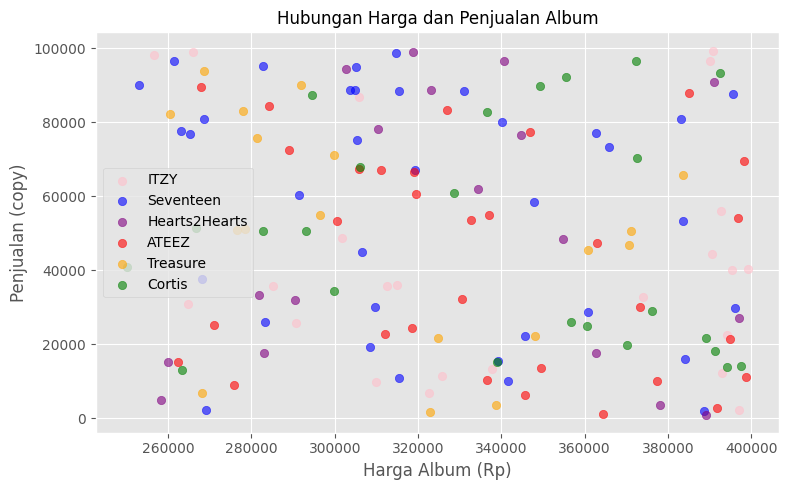

In [16]:
# HOMEWORK TUGAS 3

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum, count as _count
import random
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Tugas3_KpopAlbumSales").getOrCreate()

# Buat dataset besar (150 baris)

groups = [
    ("ATEEZ", "KQ Entertainment"),
    ("Treasure", "YG Entertainment"),
    ("Seventeen", "Pledis Entertainment"),
    ("Cortis", "BigHit Music"),
    ("Hearts2Hearts", "SM Entertainment"),
    ("ITZY", "JYP Entertainment")
]

albums = []
random.seed(42)

for i in range(150):
    group, company = random.choice(groups)
    album_name = f"Album_{group}_{i+1}"
    year = random.choice(range(2018, 2025))
    price = random.randint(250000, 400000)
    sales = random.randint(1000, 100000)  # jumlah copy terjual
    albums.append((album_name, group, company, year, price, sales))

album_df = spark.createDataFrame(
    albums,
    ["Album", "Group", "Company", "Year", "Price", "Sales"]
)

album_df.createOrReplaceTempView("albums")

# Total penjualan (SUM), rata-rata harga (AVG), dan jumlah album (COUNT) per grup
sales_summary = spark.sql("""
SELECT 
    Group,
    COUNT(Album) AS Total_Albums,
    SUM(Sales) AS Total_Sales,
    ROUND(AVG(Price), 0) AS Avg_Price
FROM albums
GROUP BY Group
ORDER BY Total_Sales DESC
""")

# Total penjualan per agensi 
companies = spark.createDataFrame(groups, ["Group", "Company"])
companies.createOrReplaceTempView("companies")

agency_summary = spark.sql("""
SELECT 
    c.Company,
    SUM(a.Sales) AS Total_Sales,
    ROUND(AVG(a.Price),0) AS Avg_Album_Price,
    COUNT(a.Album) AS Total_Albums
FROM albums a
JOIN companies c ON a.Group = c.Group
GROUP BY c.Company
ORDER BY Total_Sales DESC
""")

# Tren penjualan per tahun
yearly_trend = spark.sql("""
SELECT 
    Year,
    SUM(Sales) AS Total_Sales,
    ROUND(AVG(Price),0) AS Avg_Price
FROM albums
GROUP BY Year
ORDER BY Year
""")

# Convert ke Pandas untuk visualisasi
sales_pd = sales_summary.toPandas()
agency_pd = agency_summary.toPandas()
yearly_pd = yearly_trend.toPandas()
album_pd = album_df.toPandas()


# Visualisasi 
plt.style.use('ggplot')

# Bar chart — total penjualan per grup
plt.figure(figsize=(8,5))
plt.bar(sales_pd["Group"], sales_pd["Total_Sales"], color="skyblue")
plt.title("Total Penjualan Album per Grup K-Pop", fontsize=12)
plt.xlabel("Grup K-Pop")
plt.ylabel("Total Penjualan (copy)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Pie chart — proporsi penjualan antar agensi
plt.figure(figsize=(6,6))
plt.pie(
    agency_pd["Total_Sales"],
    labels=agency_pd["Company"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Proporsi Penjualan Album Berdasarkan Agensi", fontsize=12)
plt.show()

# Line chart — tren penjualan per tahun
plt.figure(figsize=(8,5))
plt.plot(yearly_pd["Year"], yearly_pd["Total_Sales"], marker="o", color="purple")
plt.title("Tren Penjualan Album K-Pop per Tahun", fontsize=12)
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan (copy)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter — harga vs penjualan
plt.figure(figsize=(8,5))
colors = {
    "ATEEZ": "red",
    "Treasure": "orange",
    "Seventeen": "blue",
    "Cortis": "green",
    "Hearts2Hearts": "purple",
    "ITZY": "pink"
}
for group in album_pd["Group"].unique():
    subset = album_pd[album_pd["Group"] == group]
    plt.scatter(subset["Price"], subset["Sales"], label=group, alpha=0.6, c=colors[group])
plt.title("Hubungan Harga dan Penjualan Album", fontsize=12)
plt.xlabel("Harga Album (Rp)")
plt.ylabel("Penjualan (copy)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
